In [1]:
import pandas as pd
from vega_datasets import data
import matplotlib.pyplot as plt

For all of the datasets below, examine the data types of each column, ensure that the dates are in the proper format, and set the dataframe's index to the date column as appropriate.



Use the above dataset for the following exercises:

1) Resample by the day and take the average temperature. Visualize the average temperature over time.
2) Write the code necessary to visualize the minimum temperature over time.
3) Write the code necessary to visualize the maximum temperature over time.
4) Which month is the coldest, on average?
5) Which month has the highest average temperature?
6) Resample by the day and calculate the min and max temp for the day (Hint: .agg(['min', 'max'])). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?
7) Bonus: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

In [2]:
san_fran = data.sf_temps()
san_fran.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [3]:
san_fran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8759 entries, 0 to 8758
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   temp    8759 non-null   float64       
 1   date    8759 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 137.0 KB


In [4]:
san_fran = san_fran.set_index('date').sort_index()
san_fran

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0
...,...
2010-12-31 19:00:00,50.4
2010-12-31 20:00:00,49.9
2010-12-31 21:00:00,49.4


<AxesSubplot:xlabel='date'>

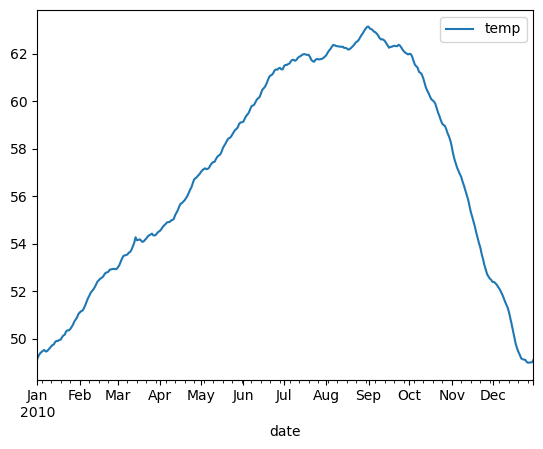

In [5]:
# 1) Resample by the day and take the average temperature. 
# Visualize the average temperature over time.

#resampling by day to reduce datapoints
san_fran.resample('D').mean().plot()


<AxesSubplot:xlabel='date'>

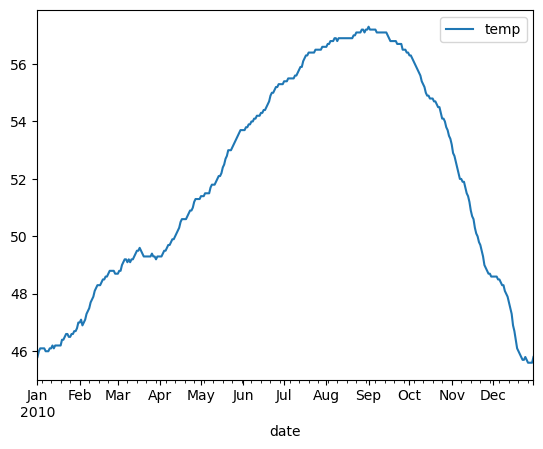

In [6]:
# 2) Write the code necessary to visualize the 
# minimum temperature over time.

san_fran.resample('D').min().plot()

<AxesSubplot:xlabel='date'>

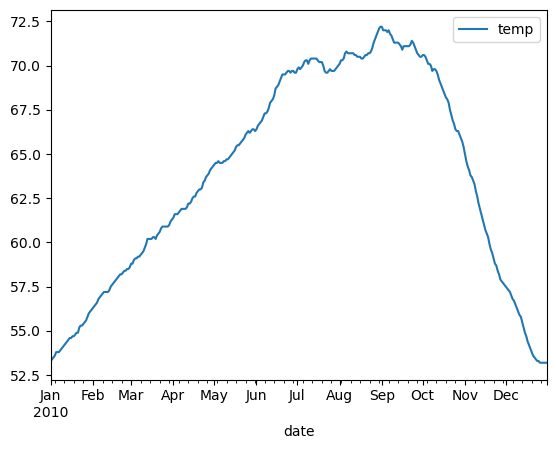

In [7]:
#3) Write the code necessary to visualize the maximum temperature over time.
san_fran.resample('D').max().plot()


In [8]:
# 4) Which month is the coldest, on average?
san_fran.temp.resample('M').mean().sort_values().head(1)

date
2010-01-31    49.98414
Name: temp, dtype: float64

In [9]:
# 5) Which month has the highest average temperature?

san_fran.temp.resample('M').mean().sort_values().tail(1)

date
2010-09-30    62.487083
Name: temp, dtype: float64

In [10]:
#6) Resample by the day and calculate the min and max temp 
# for the day (Hint: .agg(['min', 'max'])). Use this resampled 
# dataframe to calculate the change in temperature for the day. 
# Which month has the highest daily temperature variability?


#san_fran = san_fran.resample('D').agg(['min', 'max'])


In [11]:
san_fran['temp_min'] = san_fran.temp.min()
san_fran['temp_max'] = san_fran.temp.max()
san_fran['temp_variance'] = san_fran['temp_max'] - san_fran['temp_min']

In [12]:
san_fran.head()

,temp,temp_min,temp_max,temp_variance
date,,,,
2010-01-01 00:00:00,47.8,45.6,72.2,26.6
2010-01-01 01:00:00,47.4,45.6,72.2,26.6
2010-01-01 02:00:00,46.9,45.6,72.2,26.6
2010-01-01 03:00:00,46.5,45.6,72.2,26.6
2010-01-01 04:00:00,46.0,45.6,72.2,26.6


In [13]:
san_fran.temp_variance.sort_values(ascending= False).head(1)

date
2010-01-01    26.6
Name: temp_variance, dtype: float64

- - -

In [14]:
seattle = data.seattle_weather()
seattle.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [15]:
seattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


Use the above dataset for the following exercises:

1) Which year and month combination has the highest amount of precipitation?
2) Visualize the amount of monthly precipitation over time.
3) Visualize the amount of wind over time. Choose a time interval you think is appropriate.
4) Which year-month combination is the windiest?
5) What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)
6) In which month does it rain the most?
7) Which month has the most number of days with a non-zero amount of precipitation?

In [16]:
seattle.set_index('date').sort_index()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,fog
2015-12-28,1.5,5.0,1.7,1.3,fog
2015-12-29,0.0,7.2,0.6,2.6,fog


In [17]:
seattle = seattle.set_index('date').sort_index()

1) Which year and month combination has the highest amount of precipitation?

In [18]:
most_precipitation = seattle.precipitation.resample('M').mean().sort_values(ascending= False).head(1)
most_precipitation


date
2015-12-31    9.177419
Name: precipitation, dtype: float64

2) Visualize the amount of monthly precipitation over time.


<AxesSubplot:xlabel='date'>

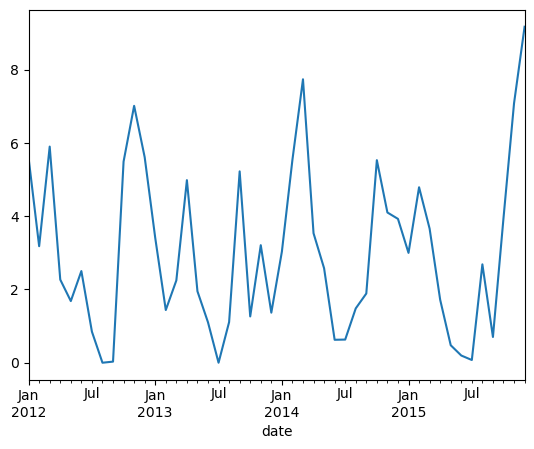

In [19]:
seattle.precipitation.resample('M').mean().plot()

3) Visualize the amount of wind over time. Choose a time interval you think is appropriate.


<AxesSubplot:xlabel='date'>

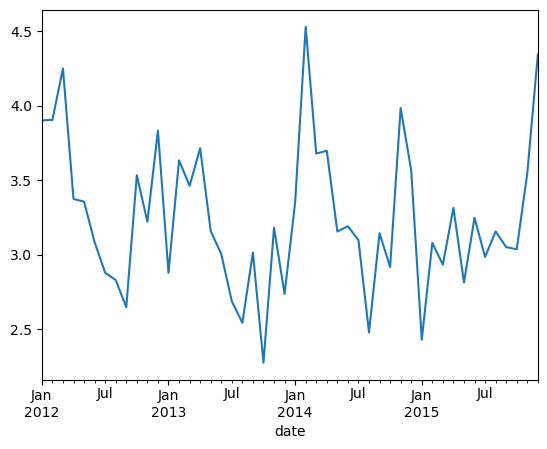

In [20]:
seattle.wind.resample('M').mean().plot()

4) Which year-month combination is the windiest?


In [21]:
seattle.wind.resample('M').mean().sort_values(ascending= False).head(1)

date
2014-02-28    4.528571
Name: wind, dtype: float64

5) What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)


In [25]:
seattle.groupby(by = seattle.weather).value_counts

<bound method DataFrameGroupBy.value_counts of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x13435c490>>

6) In which month does it rain the most?


In [ ]:
seattle.weather.loc['rain']

7) Which month has the most number of days with a non-zero amount of precipitation?

- - -

In [ ]:
flights = data.flights_20k()
flights.head()

Use the above dataset for the following exercises:

1) Convert any negative delays to 0.
2) Which hour of the day has the highest average delay?
3) Does the day of the week make a difference in the delay amount?
4) Does the month make a difference in the delay amount?